In [1]:
import sys
import numpy as np
sys.path.append('../')

import data_generation

Here we define our first parameters:

- N: Total number of observations, for example, it could be the number of rows of a dataframe

- d: Number of features that we consider (no multicolinearity is supposed and ensured when generating the covariance matrix)

- T: Number of periods (we divide our observations on equally sized periods)

The idea is to generate synthetic data for us to be able to test the model afterwards. 

We came up with the idea of generating a vector of size d using a normal joint gaussian distribution with mean 0 and variance matrix Sigma. 

We construct Sigma such that it is positive definite. 

We use Sigma for a period of size N//T and then construct another Sigma. We repeat this to construct the dataframe.

In [2]:
N = 1000   
d = 5      
T = 10    

df, covariances = data_generation.generate_time_varying_gaussian_data(N, d, T)

In [3]:
df.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,-1.397262,-1.354597,-1.058966,-2.466514,3.554569
1,1.680607,2.051741,1.572379,2.040751,-3.669189
2,-0.503749,3.758077,3.400811,1.424954,-0.999506
3,-2.257941,0.114323,-0.095334,-0.560092,2.482822
4,-1.341048,-0.596354,-1.166520,0.357499,0.374802


Covariance matrix of the first period

In [4]:
covariances[0]

array([[ 3.95034869, -0.03690139, -0.12169217,  2.43316981, -3.90895601],
       [-0.03690139,  5.54007371,  5.7259061 ,  2.75195456, -2.58243959],
       [-0.12169217,  5.7259061 ,  6.5794145 ,  2.67391906, -2.64383021],
       [ 2.43316981,  2.75195456,  2.67391906,  4.07029422, -4.69915618],
       [-3.90895601, -2.58243959, -2.64383021, -4.69915618,  6.62796669]])

Check that eigen values are positive

In [5]:
np.linalg.eigvals(covariances[0])

array([17.05161327,  8.20127022,  0.88453968,  0.40702758,  0.22364705])

Here we check the evolution of the covariance matrix over time using heatmaps

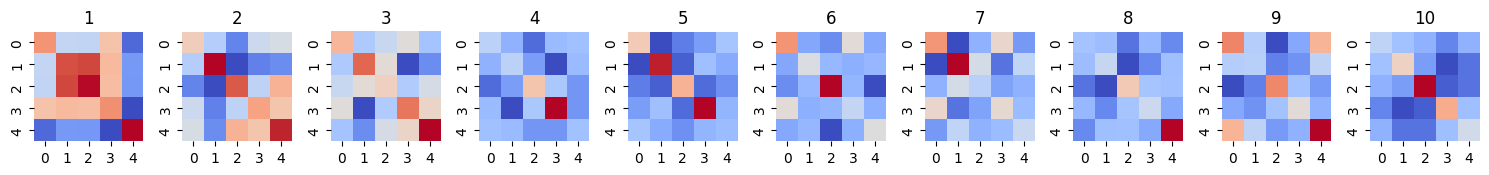

In [6]:
data_generation.plot_covariance_heatmaps(covariances)


In [7]:
# Simulation
N = 1000  
d = 6      
T = 10     
t_shift = 5  
delta = 0.8  

# Générer les données
data, covariances = data_generation.generate_time_varying_gaussian_data_with_perturbation(N, d, T, t_shift, delta)

# Afficher les premières lignes des données
print(data.head())


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  Period
0  -0.830689   0.925931  -1.189691  -0.428344   0.143392  -1.018464       0
1   0.074123  -0.498613   0.782482  -0.159935   0.717277  -0.719061       0
2   0.491871   0.555572  -0.101023   0.336270   1.344506  -0.269635       0
3  -0.230046   0.371106  -1.114261  -0.022999   0.431789  -0.554931       0
4   0.494854   0.486868   0.425832   1.513453   0.482260  -0.790184       0


/Users/alaabouattour/Desktop/TVGL/Examples/../data_generation.py:116: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mean, covariance, samples_per_period)


In [11]:
data.to_csv("Examples_data/perturbation.csv")

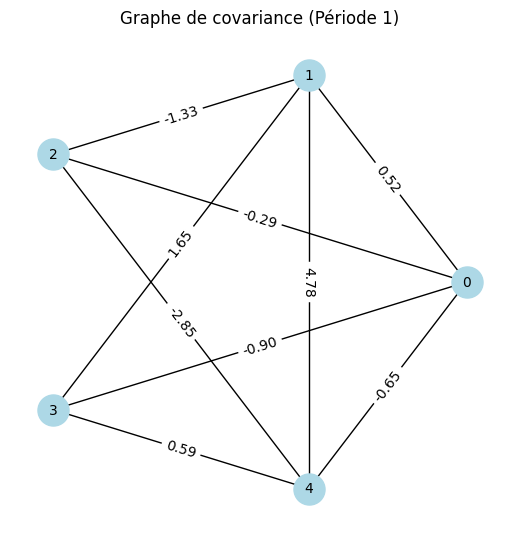

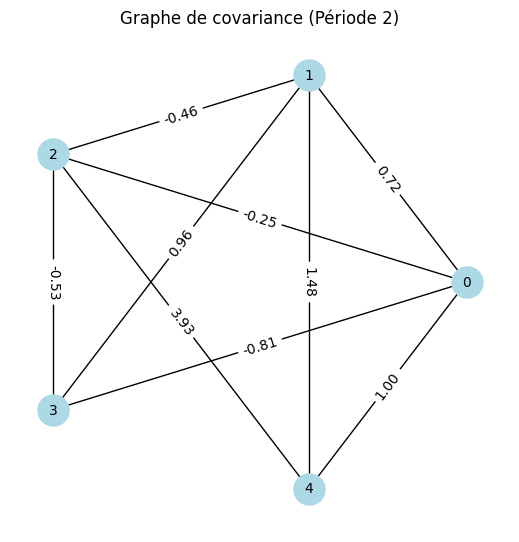

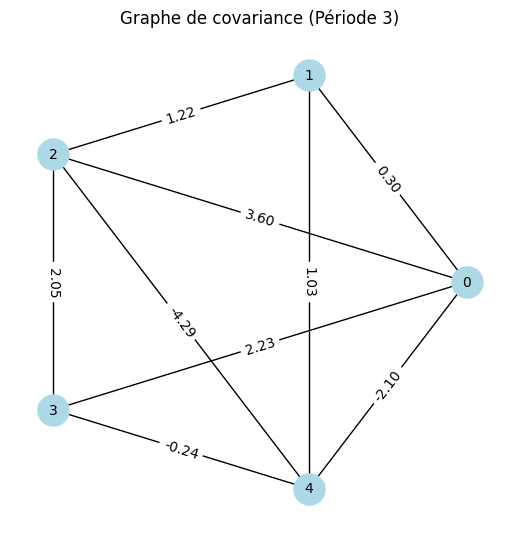

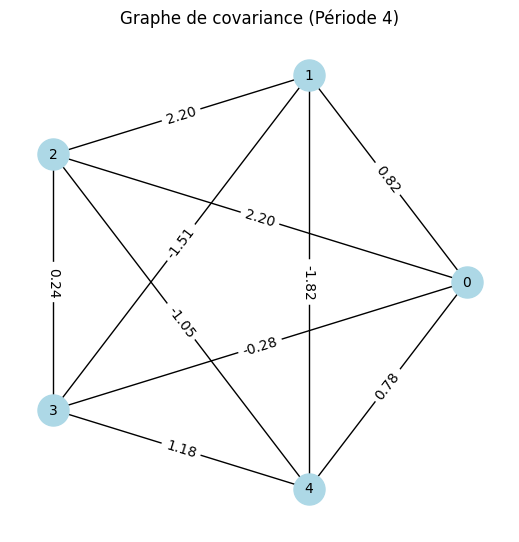

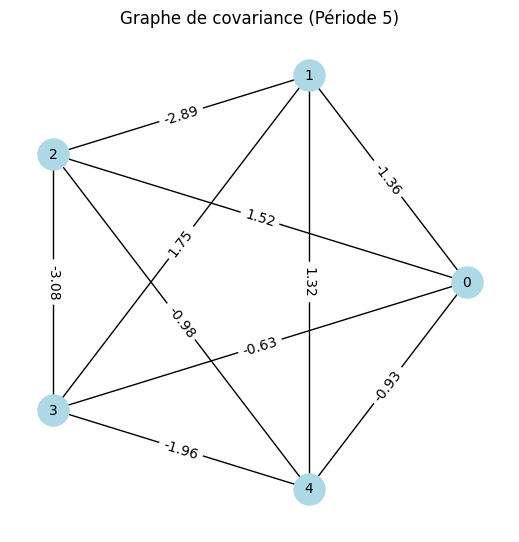

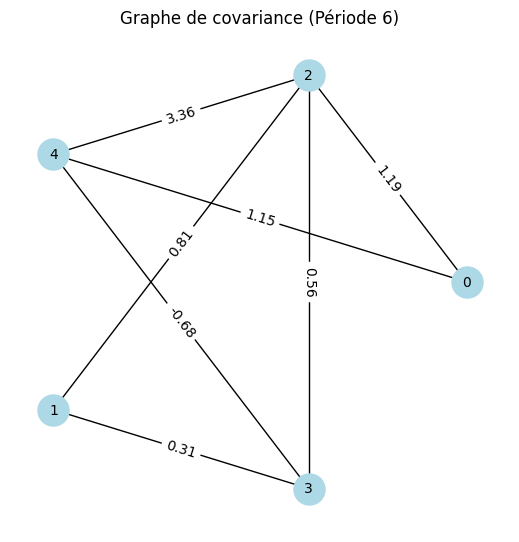

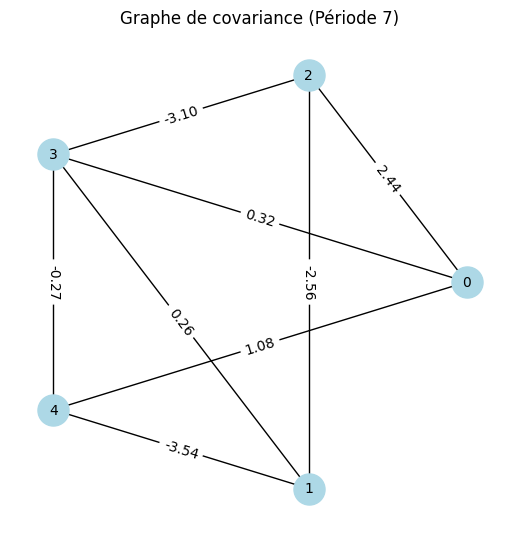

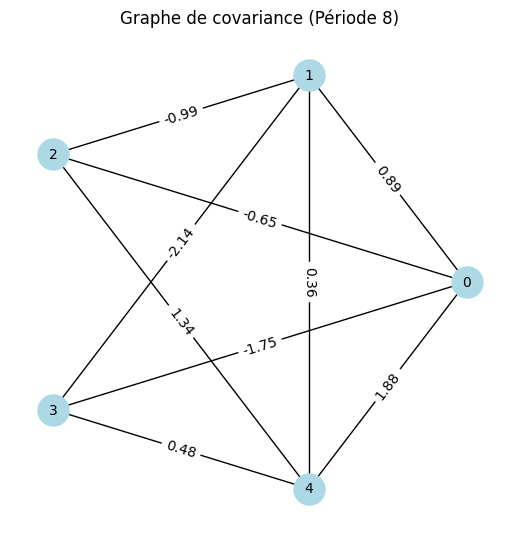

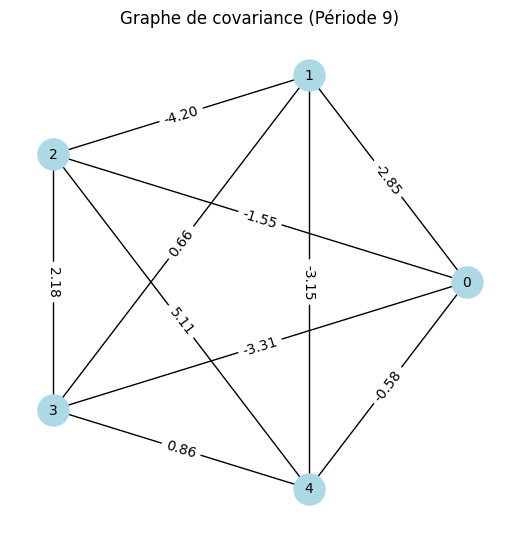

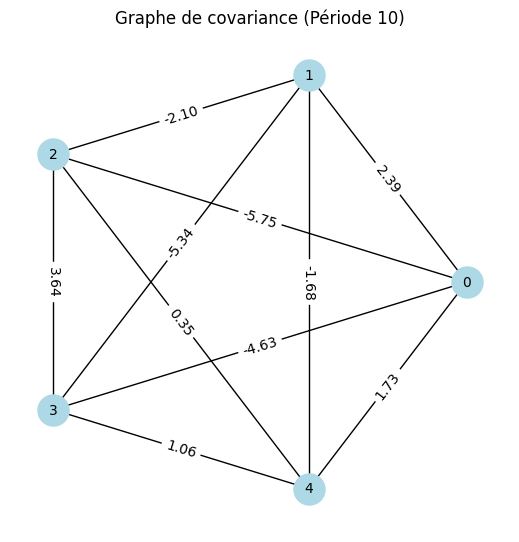

In [33]:
def plot_covariance_graph(covariances, threshold=0.1):
    """
    Visualise les matrices de covariance en tant que graphes pondérés.

    Parameters:
        - covariances: list of np.ndarray, les matrices de covariance.
        - threshold: float, valeur minimale pour inclure une arête dans le graphe.
    """
    T = len(covariances)
    for t, sigma in enumerate(covariances):
        plt.figure(figsize=(5, 5))
        G = nx.Graph()
        
        # Ajouter des nœuds et des arêtes
        d = sigma.shape[0]
        for i in range(d):
            G.add_node(i)
            for j in range(i + 1, d):
                if abs(sigma[i, j]) > threshold:
                    G.add_edge(i, j, weight=sigma[i, j])
        
        # Dessiner le graphe
        pos = nx.circular_layout(G)
        edges = G.edges(data=True)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
        nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in edges})
        plt.title(f"Graphe de covariance (Période {t + 1})")
        plt.show()

# Exemple d'utilisation
plot_covariance_graph(covariances, threshold=0.2)
